In [1]:
import os
import torch
import clip
from PIL import Image
from itertools import combinations

def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    square_image = image.resize((224, 224), Image.ANTIALIAS)
    return square_image

def calculate_clip_similarity(folder_path):
    # Load the CLIP model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)

    # Find all images in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]
    images = [load_and_preprocess_image(path) for path in image_paths]

    # Preprocess images and calculate features
    image_tensors = torch.cat([preprocess(image).unsqueeze(0).to(device) for image in images])
    print(image_tensors.shape)
    with torch.no_grad():
        image_features = model.encode_image(image_tensors).float()

    # Calculate similarity for each pair
    similarities = []
    for (img1, feature1), (img2, feature2) in combinations(zip(image_paths, image_features), 2):
        similarity = torch.nn.functional.cosine_similarity(feature1, feature2, dim=0).item()
        similarities.append((img1, img2, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[2], reverse=True)

    return similarities

# Example usage
folder_name = "/Users/zhangyanzhe/Downloads/testset_manual_filtered"
similarities = calculate_clip_similarity(folder_name)

torch.Size([835, 3, 224, 224])
('/Users/zhangyanzhe/Downloads/testset_manual_filtered/12083.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/11825.png', 1.0)
('/Users/zhangyanzhe/Downloads/testset_manual_filtered/12083.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/17369.png', 1.0)
('/Users/zhangyanzhe/Downloads/testset_manual_filtered/12083.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/16766.png', 1.0)
('/Users/zhangyanzhe/Downloads/testset_manual_filtered/1963.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/17273.png', 1.0)
('/Users/zhangyanzhe/Downloads/testset_manual_filtered/11825.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/17369.png', 1.0)
('/Users/zhangyanzhe/Downloads/testset_manual_filtered/11825.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/16766.png', 1.0)
('/Users/zhangyanzhe/Downloads/testset_manual_filtered/15428.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/11489.png', 1.0)
('/U

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/12083.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/11825.png', 1.0)


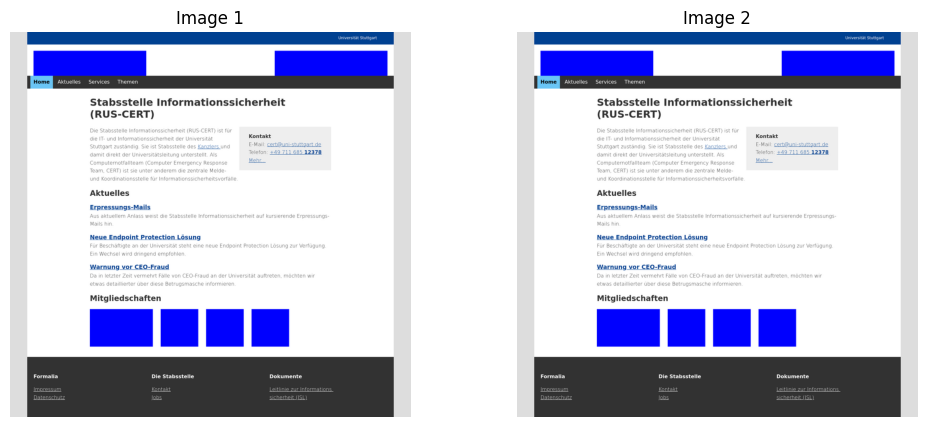

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/12083.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/17369.png', 1.0)


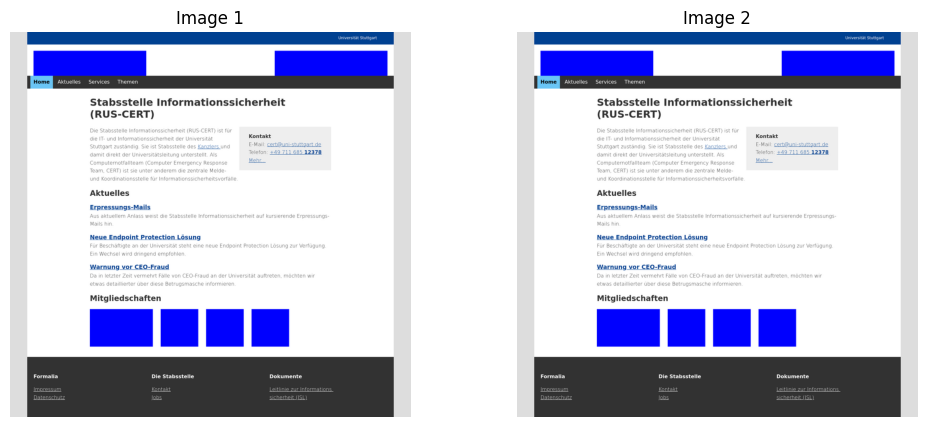

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/12083.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/16766.png', 1.0)


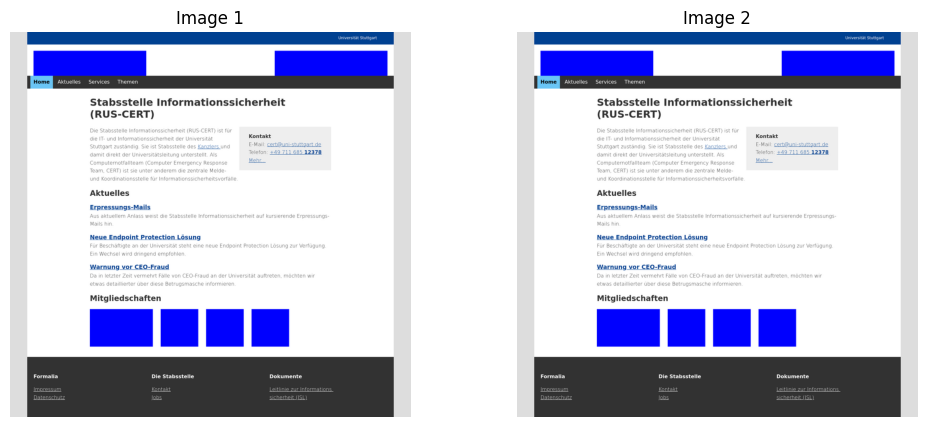

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/1963.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/17273.png', 1.0)


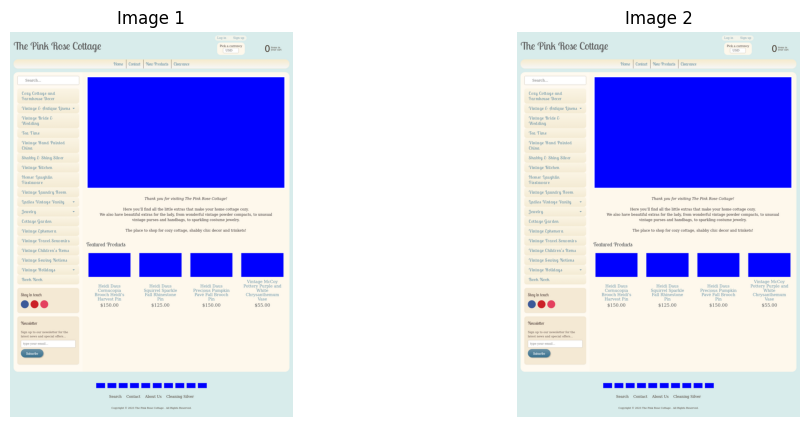

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/11825.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/17369.png', 1.0)


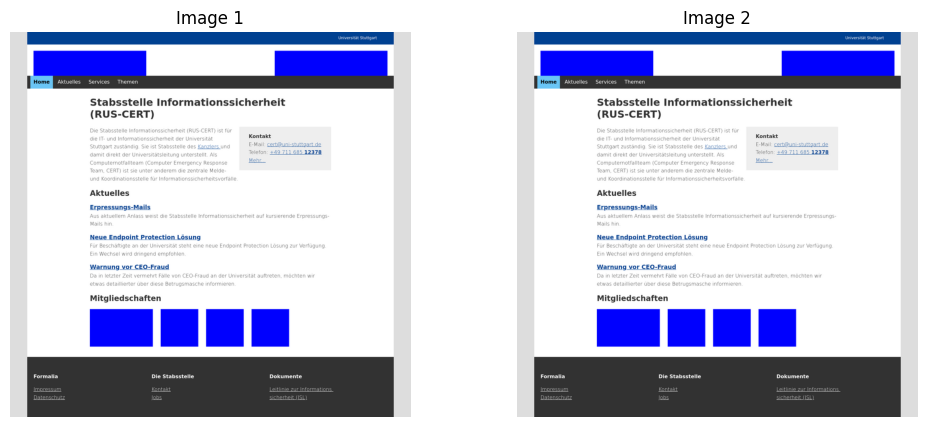

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/11825.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/16766.png', 1.0)


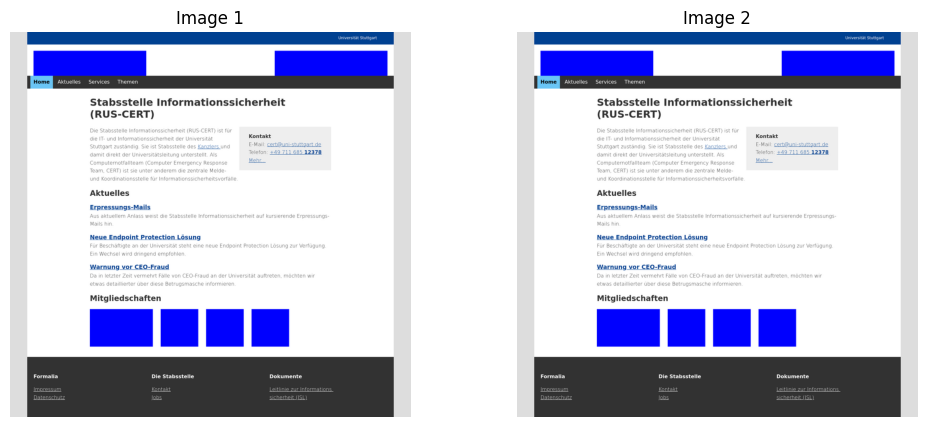

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/15428.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/11489.png', 1.0)


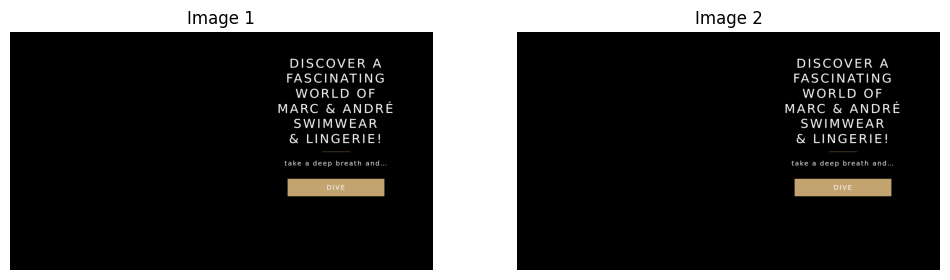

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/525.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/6356.png', 1.0)


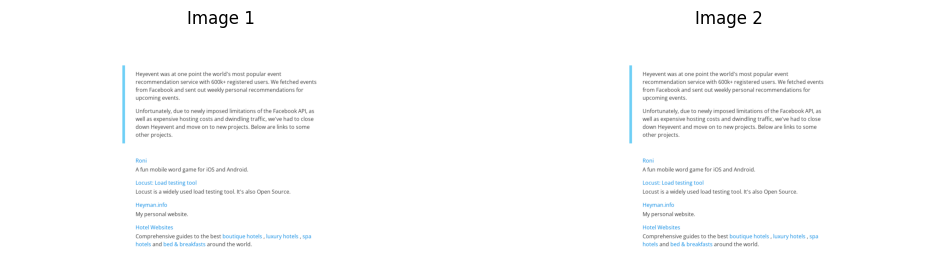

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/17369.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/16766.png', 1.0)


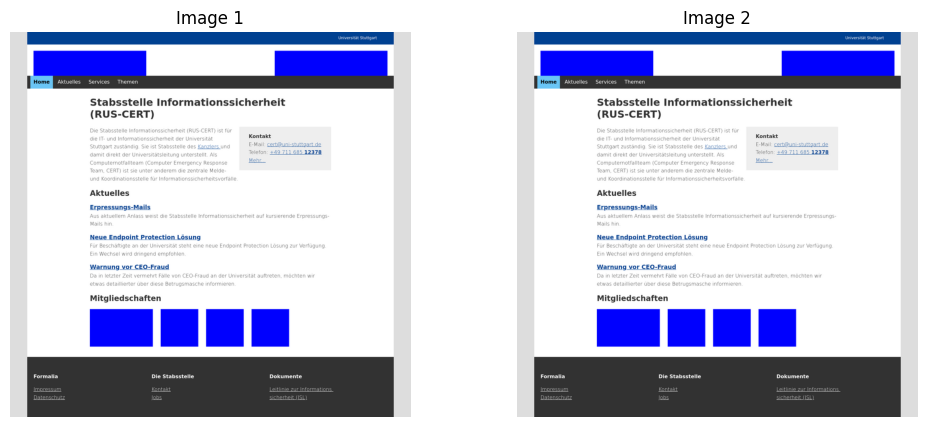

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/12636.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/13092.png', 0.9980530738830566)


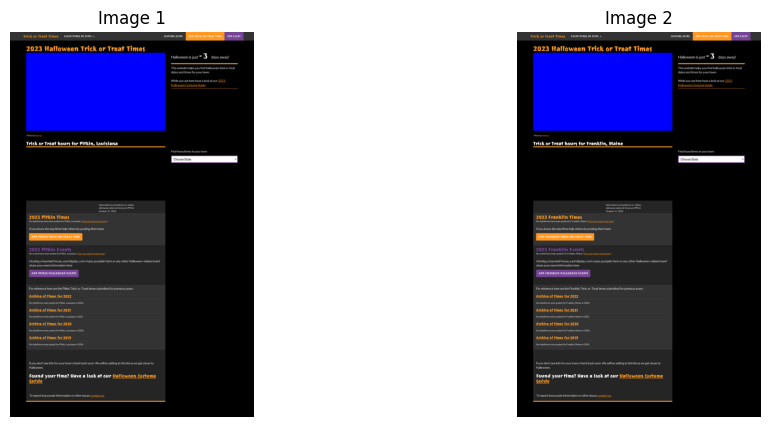

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/13322.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/17737.png', 0.9959543943405151)


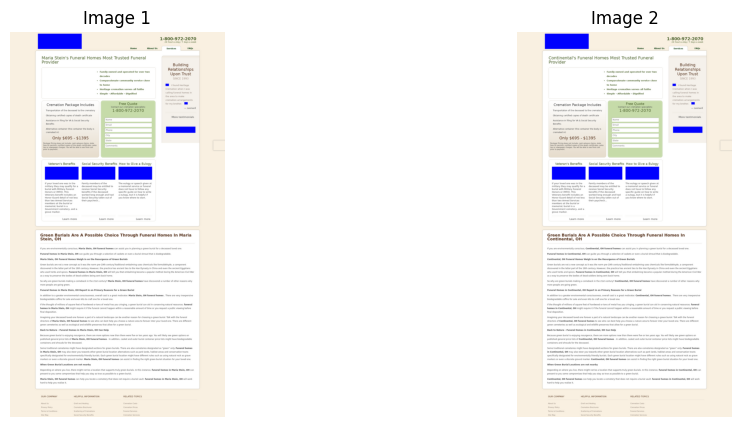

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/2789.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/17683.png', 0.9942308068275452)


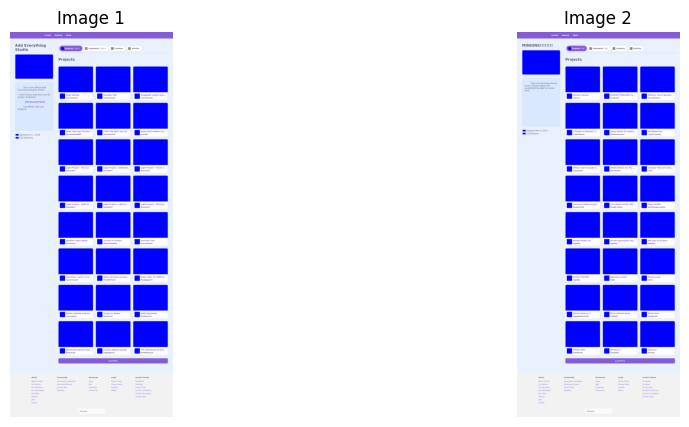

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/9898.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/10021.png', 0.9926230907440186)


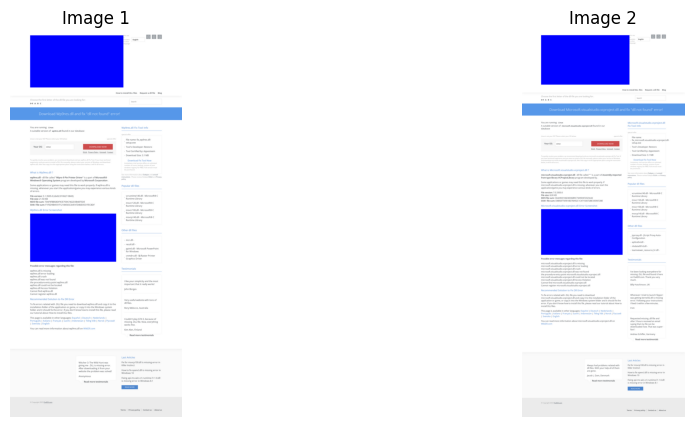

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/9335.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/12978.png', 0.9904962778091431)


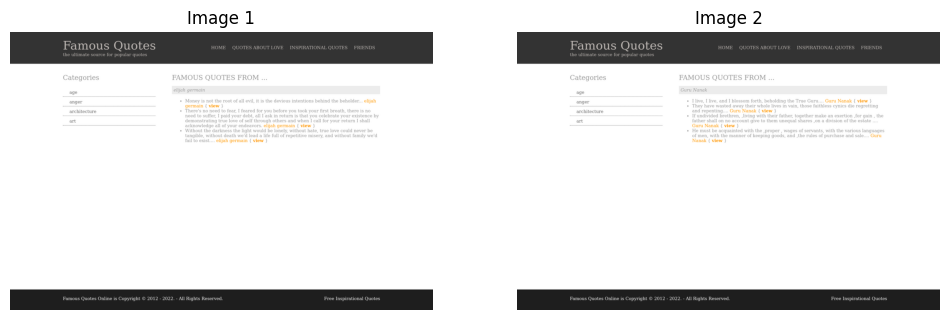

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/15299.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/4300.png', 0.9902623891830444)


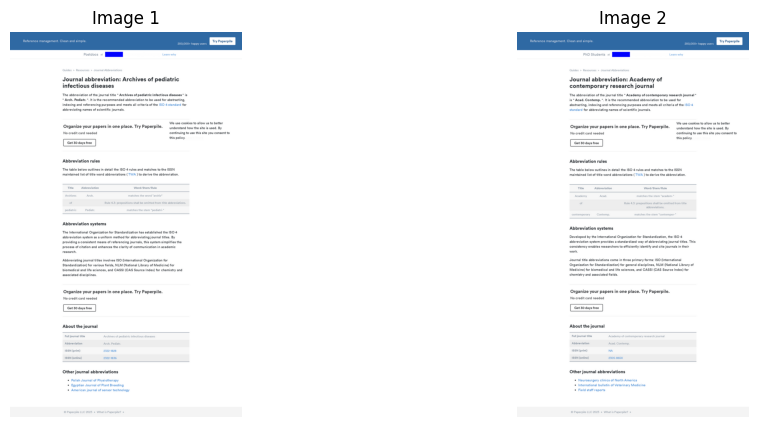

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/12836.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/2040.png', 0.9865314960479736)


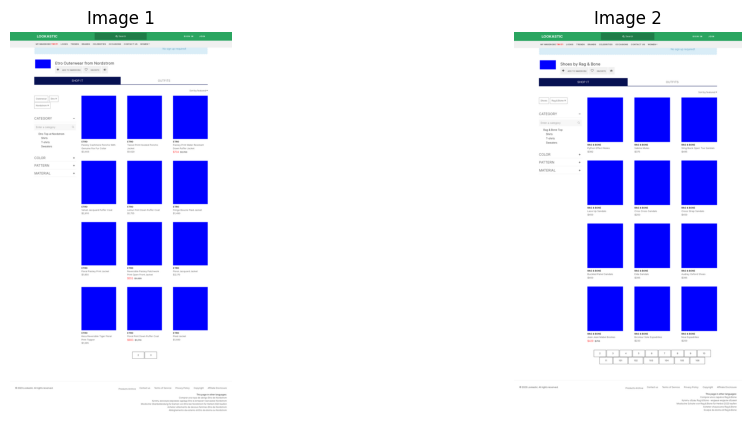

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/10531.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/4260.png', 0.9856569170951843)


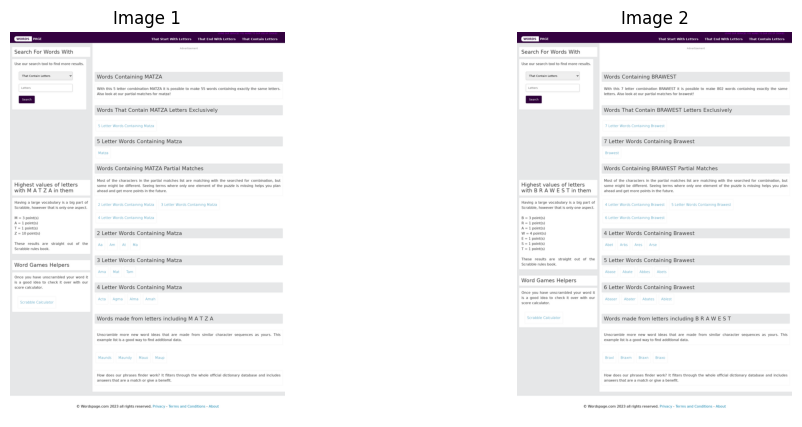

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/6139.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/8795.png', 0.9833217859268188)


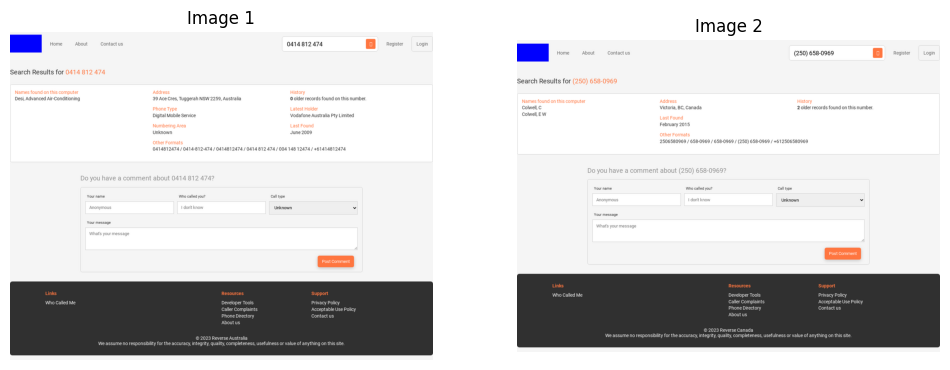

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/5180.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/6753.png', 0.9828380346298218)


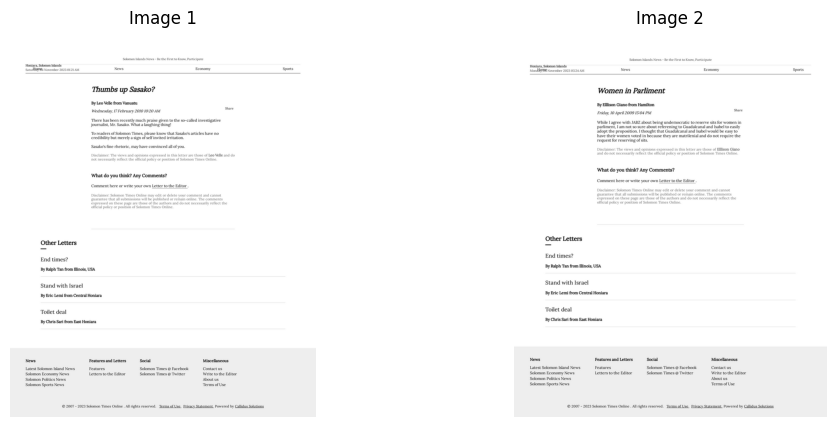

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/2138.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/6169.png', 0.9819560050964355)


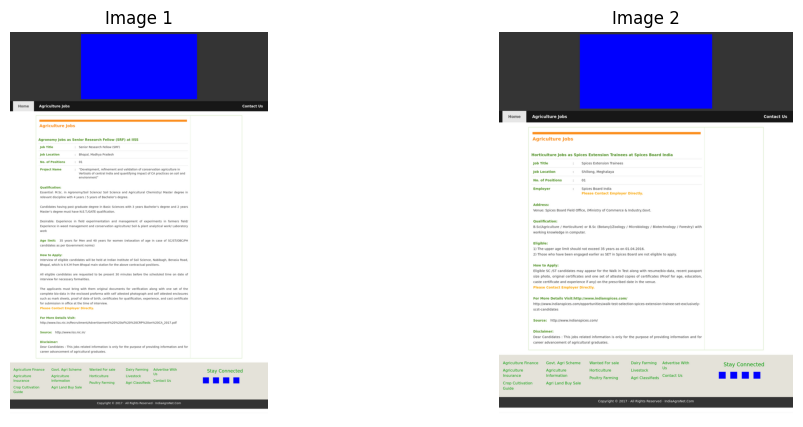

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/16634.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/3273.png', 0.9810790419578552)


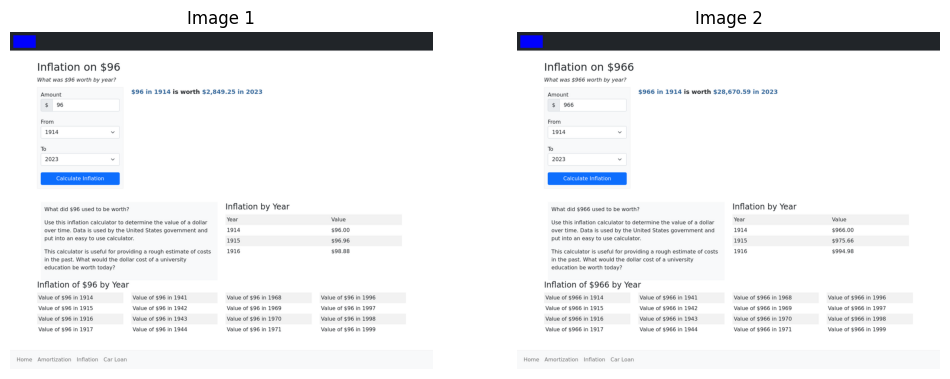

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/9262.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/3011.png', 0.9778487682342529)


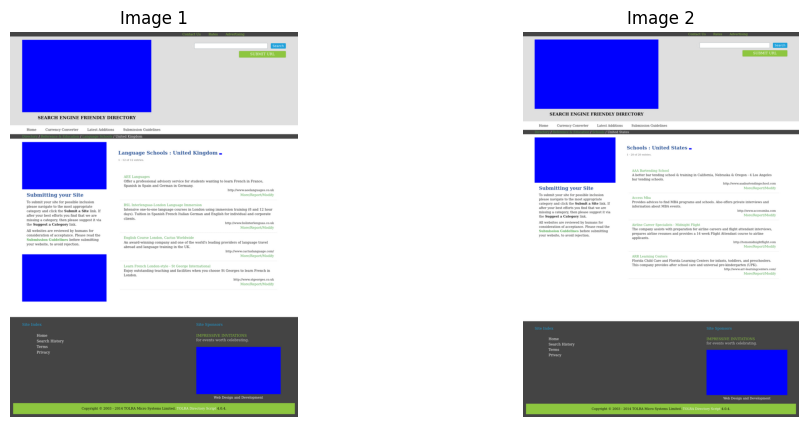

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/8389.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/11350.png', 0.9761397242546082)


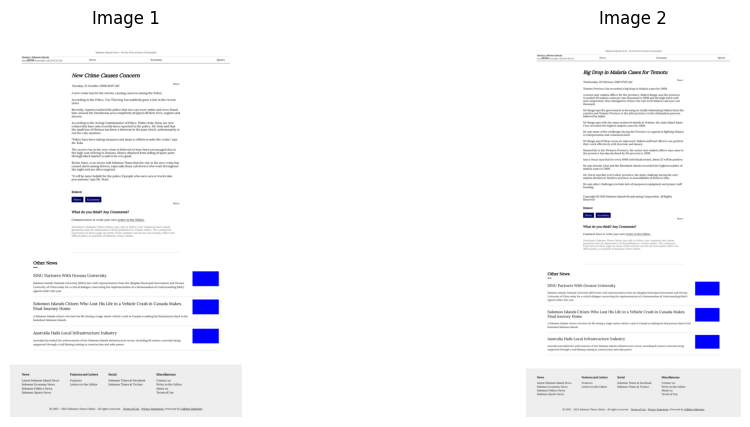

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/1802.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/12875.png', 0.9752131104469299)


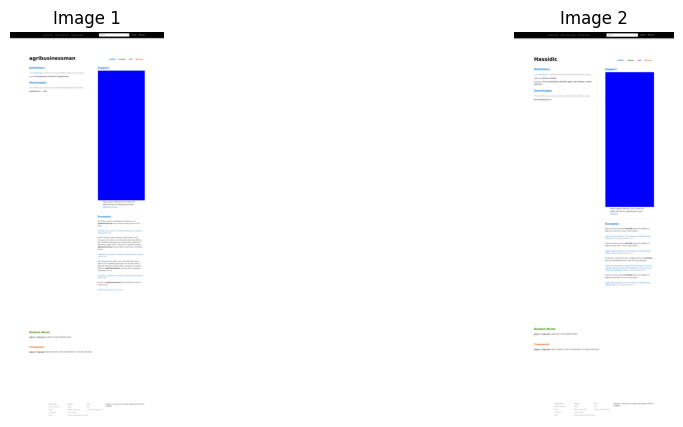

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/8998.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/4408.png', 0.9739069938659668)


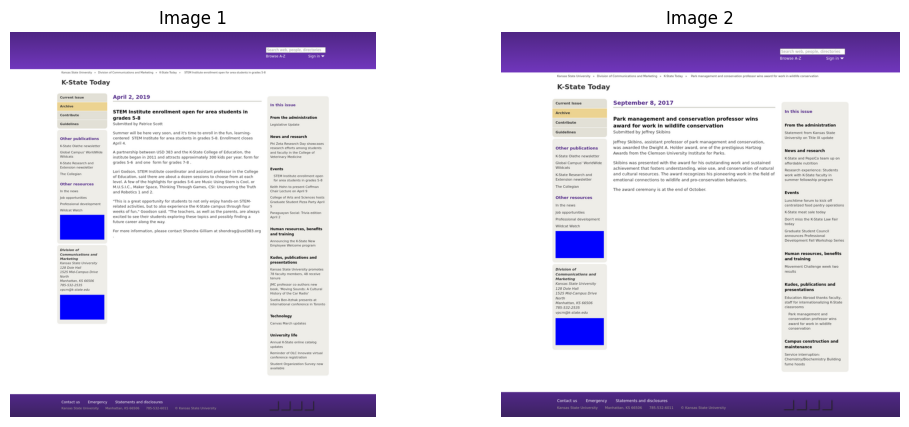

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/851.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/4408.png', 0.9725571274757385)


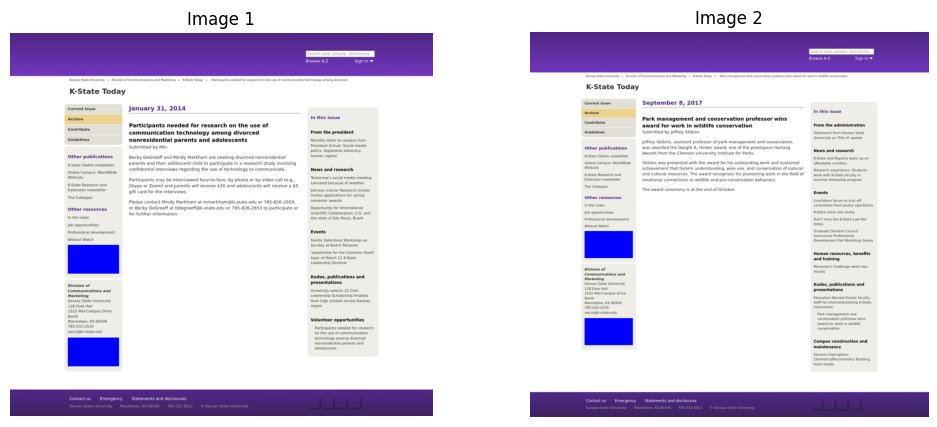

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/9545.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/11487.png', 0.9721042513847351)


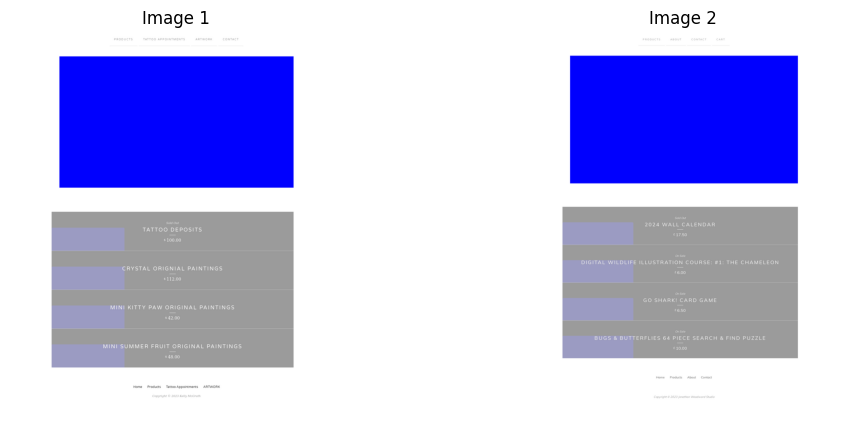

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/16634.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/10821.png', 0.971274197101593)


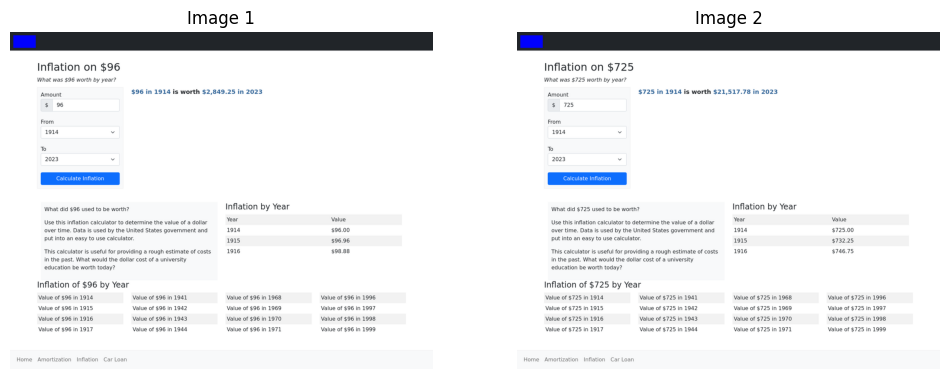

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/7125.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/14328.png', 0.9703752398490906)


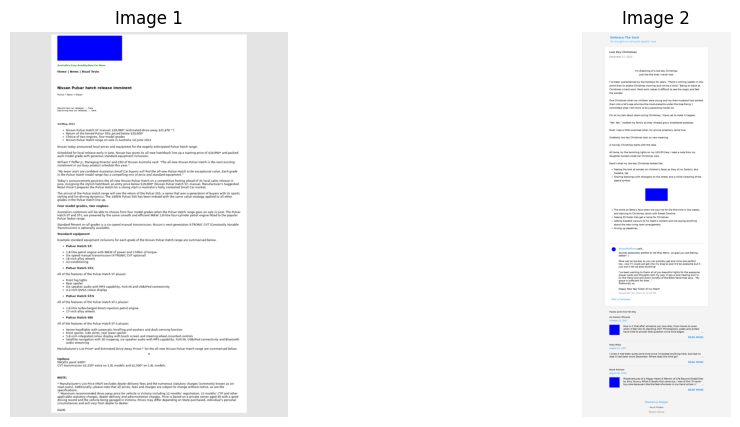

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/9276.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/12511.png', 0.9697299599647522)


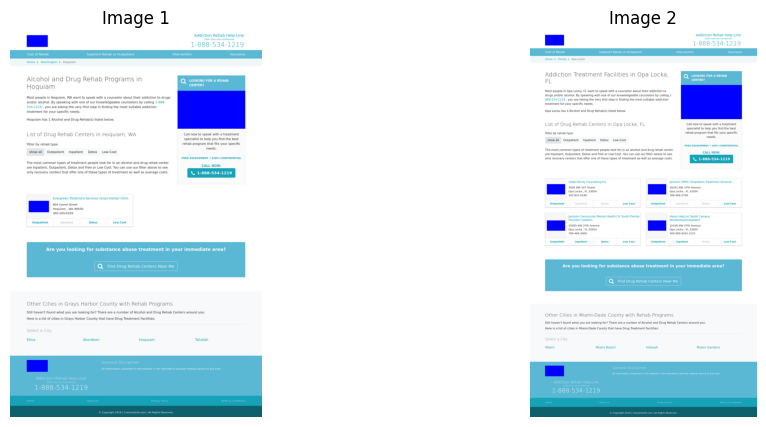

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/10821.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/3273.png', 0.9682716131210327)


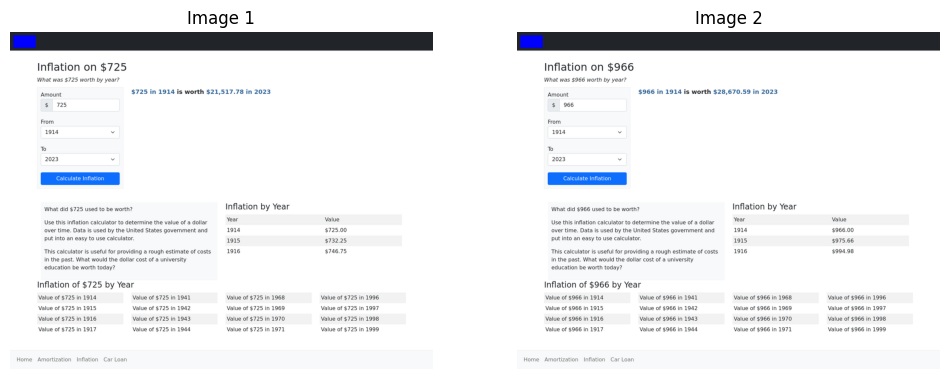

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/4277.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/13465.png', 0.9667332768440247)


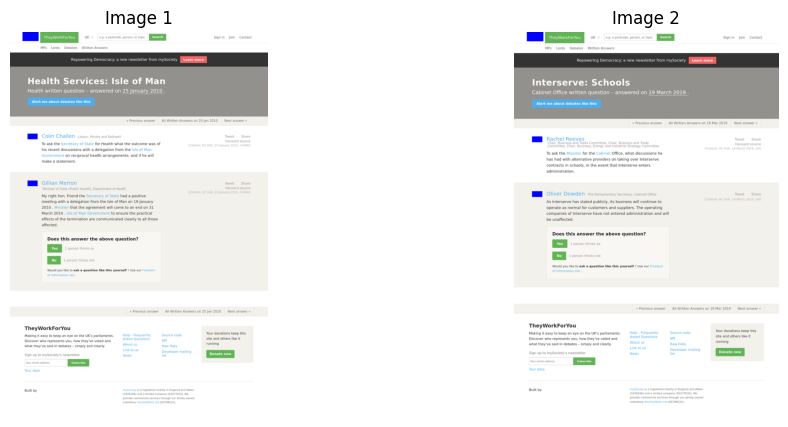

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/2930.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/29.png', 0.9612882137298584)


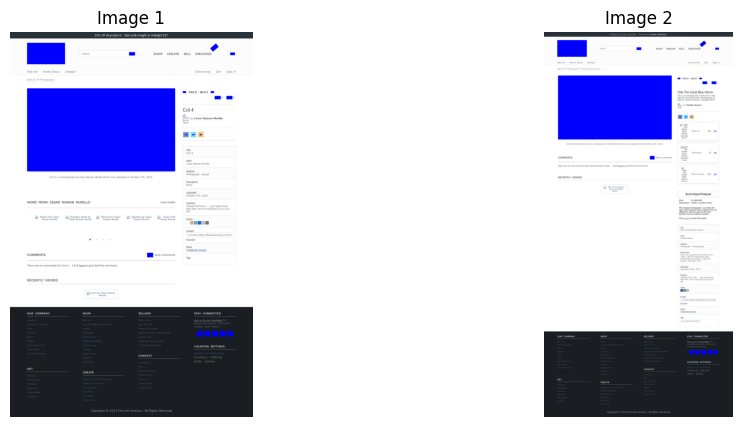

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/5668.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/123.png', 0.9611585140228271)


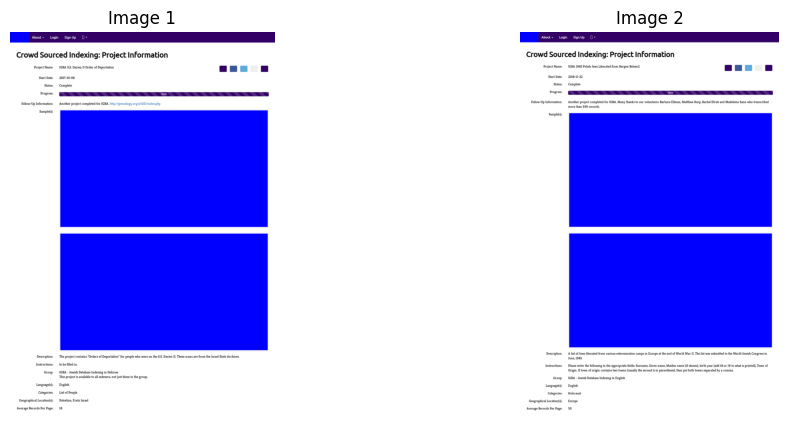

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/16591.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/3949.png', 0.9579846858978271)


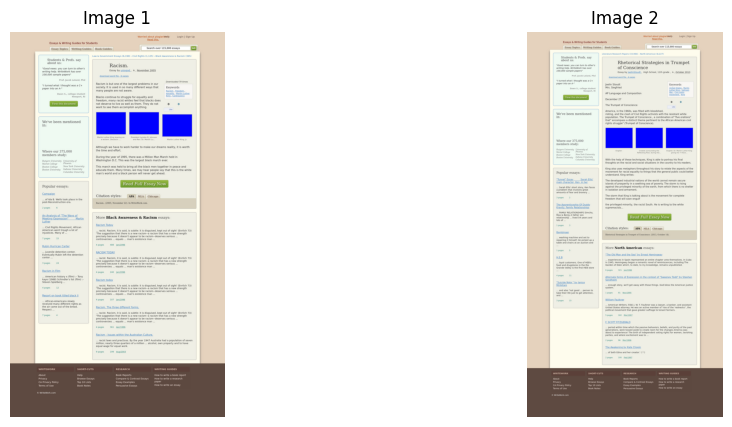

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/2106.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/3082.png', 0.9575669765472412)


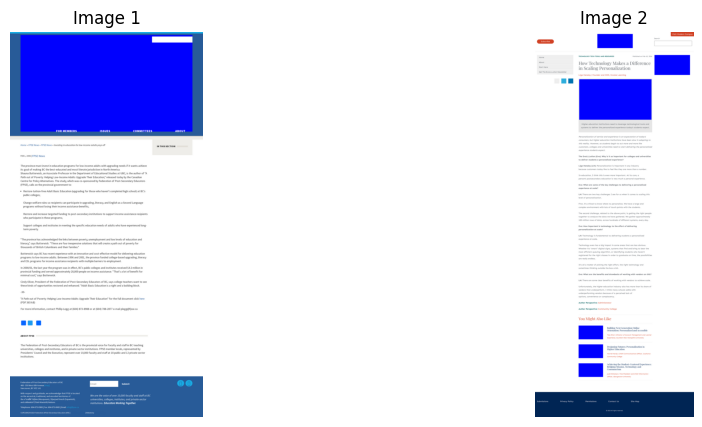

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/8706.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/3879.png', 0.9564446210861206)


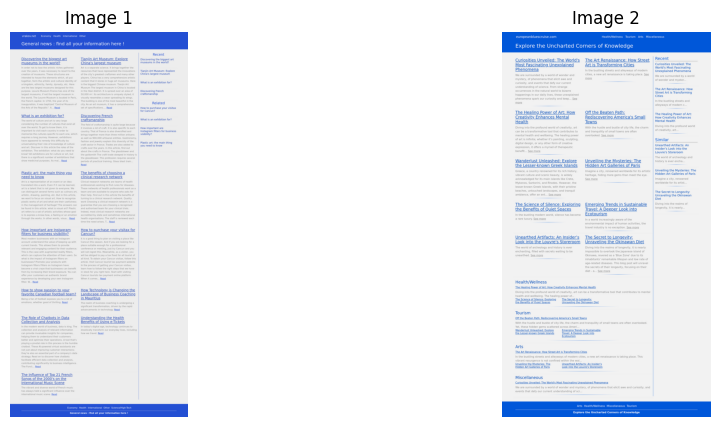

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/11200.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/2106.png', 0.9561143517494202)


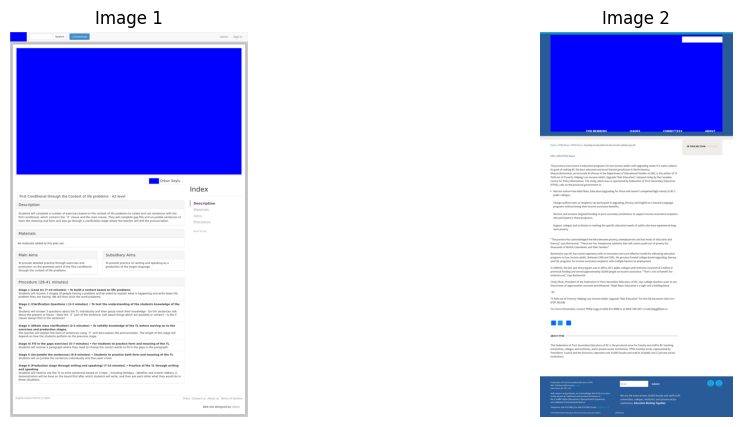

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/8389.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/6753.png', 0.9554395079612732)


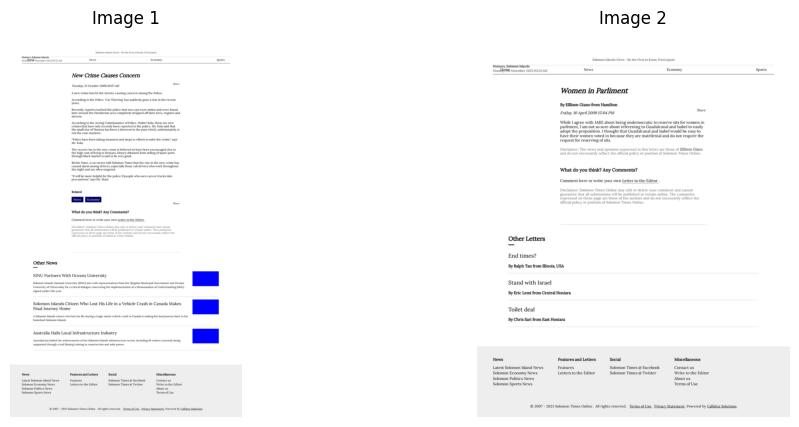

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/851.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/8998.png', 0.9554281830787659)


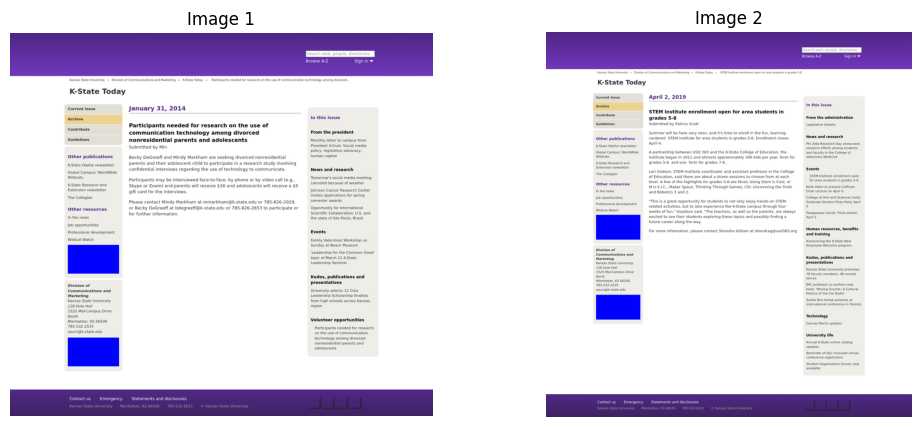

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/2106.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/8034.png', 0.9553813338279724)


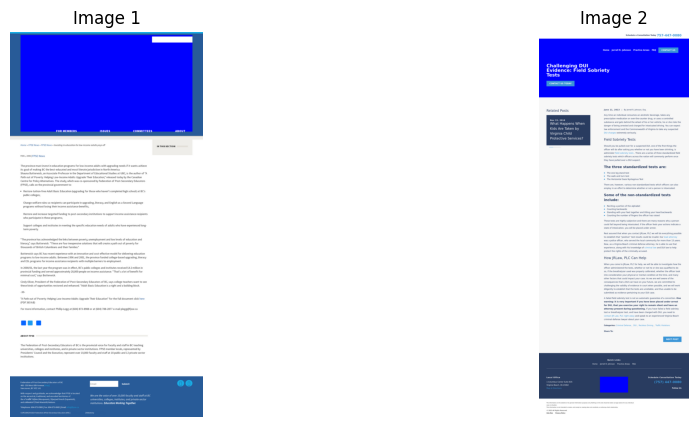

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/7125.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/11099.png', 0.9548009634017944)


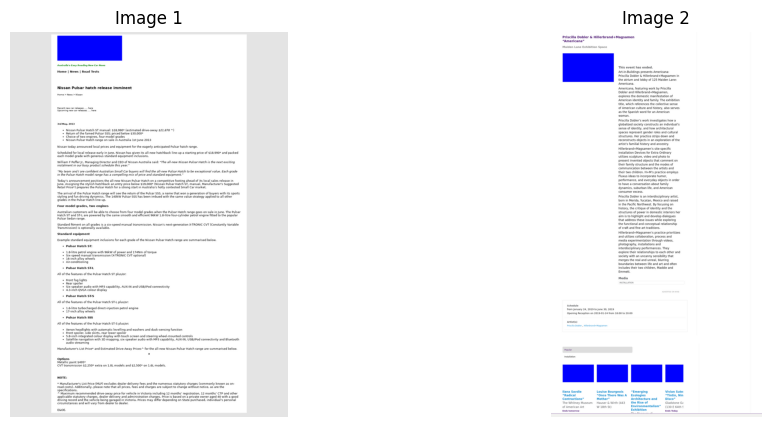

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/2106.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/790.png', 0.9546440243721008)


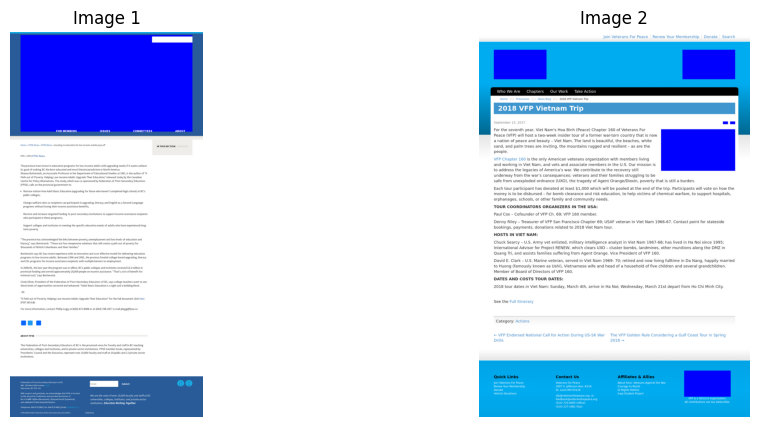

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/3585.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/309.png', 0.9543853402137756)


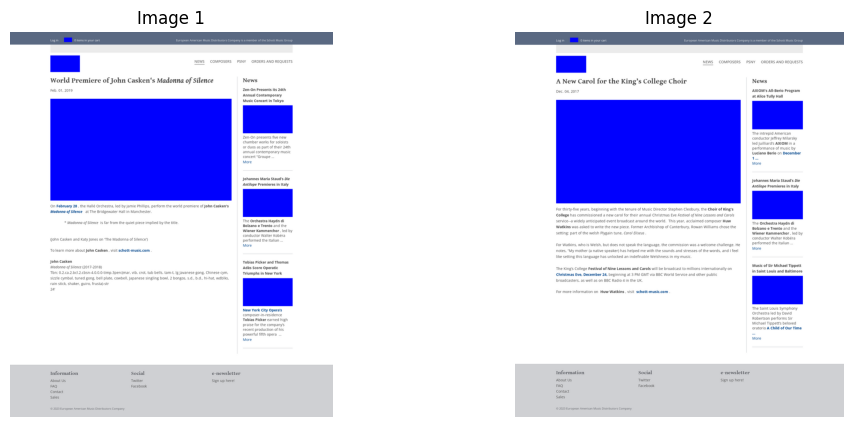

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/9898.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/102.png', 0.9533681869506836)


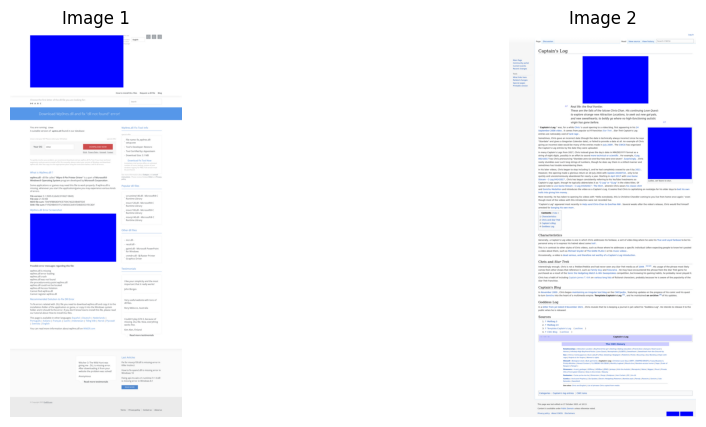

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/8389.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/5180.png', 0.951862096786499)


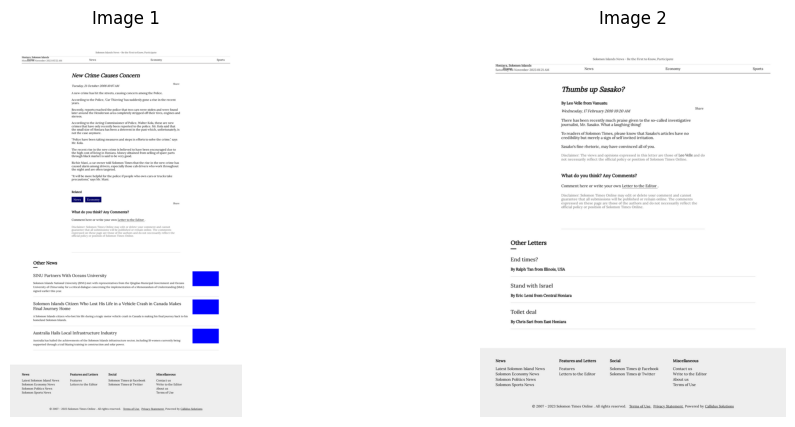

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/11981.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/2106.png', 0.9515124559402466)


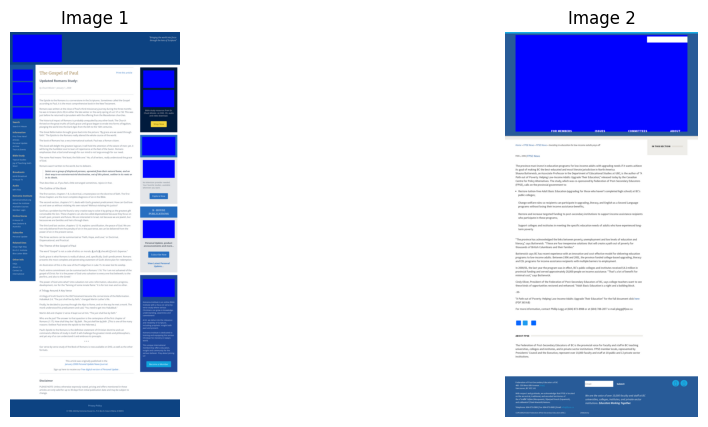

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/11099.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/14328.png', 0.9489546418190002)


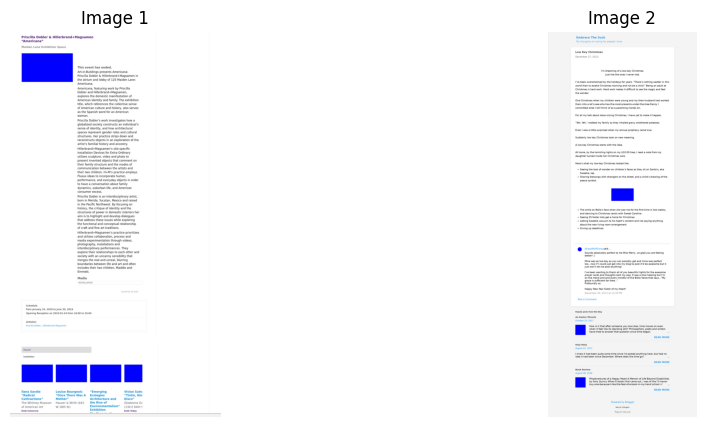

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/15603.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/3270.png', 0.9482468962669373)


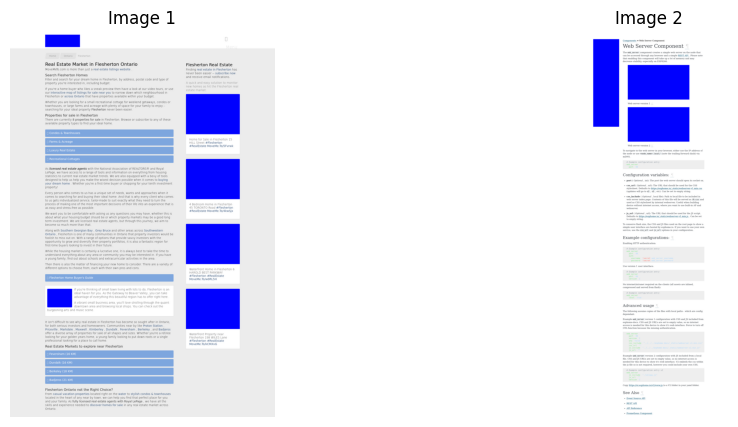

('/Users/zhangyanzhe/Downloads/testset_manual_filtered/2106.png', '/Users/zhangyanzhe/Downloads/testset_manual_filtered/1942.png', 0.9468063712120056)


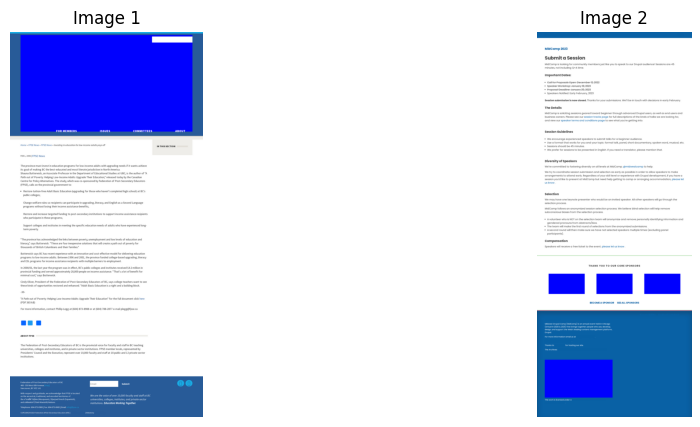

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

def show_images_side_by_side(image_path1, image_path2):
    # Load the images
    img1 = Image.open(image_path1)
    img2 = Image.open(image_path2)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Display the first image
    axes[0].imshow(img1)
    axes[0].axis('off')  # Turn off axis numbers and ticks
    axes[0].set_title('Image 1')

    # Display the second image
    axes[1].imshow(img2)
    axes[1].axis('off')
    axes[1].set_title('Image 2')

    # Show the plot
    plt.show()

for pair in similarities[:50]:
    print(pair)
    show_images_side_by_side(pair[0], pair[1])